In [683]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [684]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import resample

In [685]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks 

In [686]:
customer_churn=pd.read_csv('customer_churn.csv')

In [687]:
display(customer_churn.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [688]:
customer_churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [689]:
customer_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

 predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [690]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [691]:
customer_churn['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [692]:
customer_churn['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [693]:
customer_churn['MonthlyCharges'].nunique()

1585

In [694]:
#customer_churn.shape

all 3 independent variables are integers with no null values or funny characters. clean. no need for onehot encoder. proceed with visually investigating the y(churn)

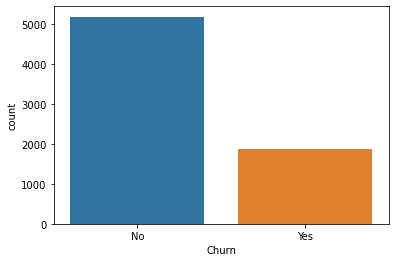

In [695]:
sns.countplot(x='Churn',data=customer_churn)
plt.show()

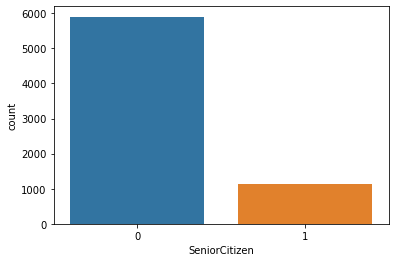

In [696]:
sns.countplot(x='SeniorCitizen', data=customer_churn)
plt.show()

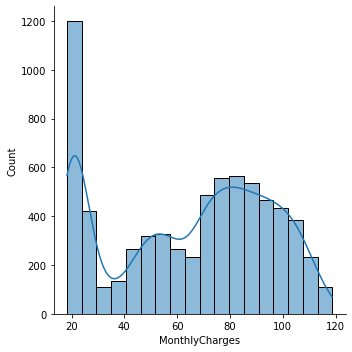

In [697]:
sns.displot(x='MonthlyCharges', data=customer_churn, kde=True)
plt.show()

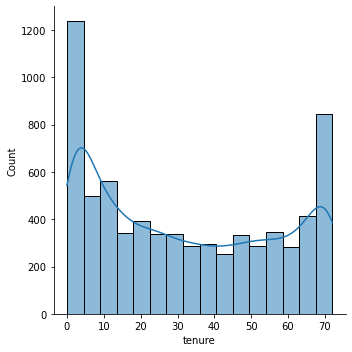

In [698]:
sns.displot(x='tenure', data=customer_churn,kde=True)
plt.show()

tenure and montlycharges fixable with standardscaler. Senior Citizen is a dummified class with 1 or 0. it has class imbalance. how are we handling this?


X-y split

In [699]:
y=customer_churn['Churn']

In [700]:
X=customer_churn[['SeniorCitizen','tenure','MonthlyCharges']]

In [701]:
correlation_matrix=X.corr()
display(correlation_matrix)

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


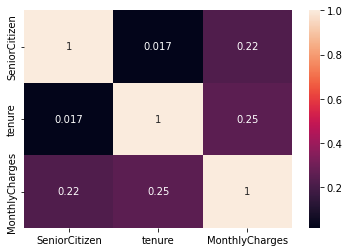

In [702]:
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [703]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14) # default test_size value is .25

In [704]:
X_test.shape

(1761, 3)

apply standard scaler fit and transform X-train and transform X-test

In [705]:
standardScaler_transfomer=StandardScaler()
standardScaler_transfomer.fit(X_train)
X_train_StandSc_np=standardScaler_transfomer.transform(X_train)
X_train_StandSc=pd.DataFrame(X_train_StandSc_np, columns=X.columns)
X_train_StandSc.head()

,SeniorCitizen,tenure,MonthlyCharges
0,-0.442226,-1.208522,0.390676
1,-0.442226,1.113445,0.958864
2,-0.442226,1.439336,0.591116
3,-0.442226,-1.167786,0.503320
4,-0.442226,-0.475269,-1.214498


In [706]:
X_test_StandSc_np=standardScaler_transfomer.transform(X_test)
X_test_StandSc=pd.DataFrame(X_test_StandSc_np, columns=X.columns)
X_test_StandSc.head()


,SeniorCitizen,tenure,MonthlyCharges
0,2.261289,0.991237,0.483441
1,-0.442226,1.561544,1.109608
2,2.261289,0.095038,0.178640
3,2.261289,1.602281,0.627559
4,-0.442226,0.176511,-0.078121


In [707]:
y_train=y_train.reset_index(drop=True) 
display(y_train.head())

0    Yes
1     No
2    Yes
3    Yes
4     No
Name: Churn, dtype: object

In [708]:
y_test=y_test.reset_index(drop=True)
display(y_test.head())

0    No
1    No
2    No
3    No
4    No
Name: Churn, dtype: object

# benchmark : simple model and underlying independant variable analysis

In [709]:
lr = LogisticRegression(random_state=14, solver='lbfgs')
lr.fit(X_train_StandSc, y_train)

LogisticRegression(random_state=14)

In [710]:
lr.predict_proba(X_train_StandSc)

array([[0.39256618, 0.60743382],
       [0.88821657, 0.11178343],
       [0.94431936, 0.05568064],
       ...,
       [0.92182118, 0.07817882],
       [0.91835704, 0.08164296],
       [0.88891332, 0.11108668]])

In [711]:
logits = np.log(lr.predict_proba(X_train_StandSc)[:,1]/(lr.predict_proba(X_train_StandSc)[:,0])) # probability of p/1-p

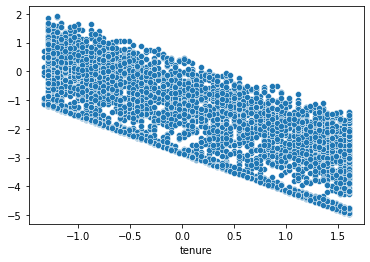

In [712]:
sns.scatterplot(y=logits, x=X_train_StandSc['tenure'])
plt.show()

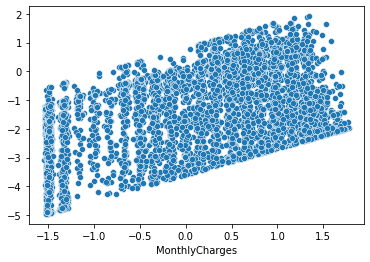

In [713]:
sns.scatterplot(y=logits, x=X_train_StandSc['MonthlyCharges'])
plt.show()

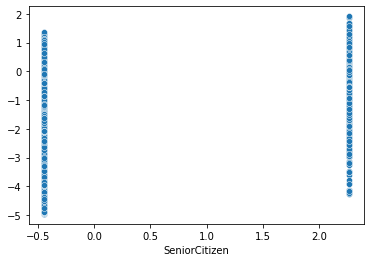

In [714]:
sns.scatterplot(y=logits, x=X_train_StandSc['SeniorCitizen'])
plt.show()

In [715]:
def sort_column(df, column_name):
    return df.iloc[df[column_name].sort_values(ascending=False).index]

In [716]:
# shows the impact of each x variable on the prediction 
impact = list( zip( list(X_test.columns), list(lr.coef_[0]) ) )
impact_df = pd.DataFrame(impact)
sort_column(impact_df,1)

,0,1
2,MonthlyCharges,0.907302
0,SeniorCitizen,0.225144
1,tenure,-1.302649


In [717]:
# shows the impact of each x variable on the prediction 
absolute_impact=list(zip(list(X_test.columns), list(np.abs(lr.coef_)[0])))
absolute_impact_df=pd.DataFrame(absolute_impact)
sort_column(absolute_impact_df,1)

,0,1
1,tenure,1.302649
2,MonthlyCharges,0.907302
0,SeniorCitizen,0.225144


In [718]:
r2_score_train_monthlycharges = r2_score(logits, X_train_StandSc['MonthlyCharges'])
print(r2_score_train_monthlycharges)

-0.8131354736788323


In [719]:
r2_score_train_monthlycharges = r2_score(logits, X_train_StandSc['tenure'])
print(r2_score_train_monthlycharges)

-2.4633073969829673


model evaluation:


In [720]:
y_pred_test = lr.predict(X_test_StandSc)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test,pos_label="Yes")))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test,pos_label="Yes")))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test,pos_label="Yes")))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.81
The precision in the TEST set is: 0.64
The recall in the TEST set is: 0.50
The F1 in the TEST set is: 0.57
The Kappa in the TEST set is: 0.44


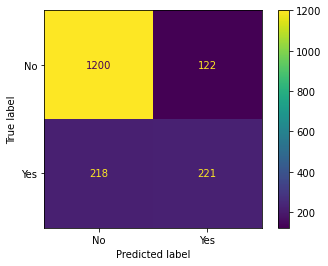

In [721]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

Accuracy score = (TP + TN)/(TP + TN + FP + FN) given the imbalance in the number of TN, the sum of TN+TP form a huge percentage of the total count of all proabilities. hence it gives a false impression of high performance of the model in predicting both values, when it only really give such a high accuracy in predicting the class imbalancing value, in this case being NO. 

# SCENARIO: APPLICATION OF SMOTE TO y AND UPANDDOWN SAMPLING TO SENIORCITIZEN X VARIABLE ( BOTH ONLY APPLIED TO THE TRAIN SETS)

try to fix class imbalance on x independent variable SeniorCitizen:

In [722]:
y=customer_churn['Churn']

In [723]:
X=customer_churn[['SeniorCitizen','tenure','MonthlyCharges']]

In [724]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14) # default test_size value is .2

In [725]:
X_train.reset_index(drop=True)

,SeniorCitizen,tenure,MonthlyCharges
0,0,3,76.95
1,0,60,94.10
2,0,68,83.00
3,0,4,80.35
4,0,21,28.50
...,...,...,...
5277,0,18,20.05
5278,0,71,24.55
5279,0,62,84.50
5280,0,25,20.75


In [726]:
# Separate majority and minority classes
X_train_majority = X_train[X_train.iloc[:,0]==0]
X_train_minority = X_train[X_train.iloc[:,0]==1]

In [727]:
X_train_majority.shape

(4418, 3)

In [728]:
# Downsample majority class
df_majority_downsampled = resample(X_train_majority, 
                                 replace=False,    
                                 n_samples=2641)
#Upsample minority class
df_minority_upsampled = resample(X_train_minority, 
                                 replace=True,     
                                 n_samples=2641)
# Combine minority class with downsampled majority class
df_up_down_sampled = pd.concat([df_majority_downsampled, df_minority_upsampled])

In [729]:
df_up_down_sampled.shape

(5282, 3)

In [730]:
df_up_down_sampled['SeniorCitizen'].value_counts()

0    2641
1    2641
Name: SeniorCitizen, dtype: int64

In [731]:
X_train=df_up_down_sampled.copy()

In [732]:
X_train.shape

(5282, 3)

apply standard scaler fit and transform X-train and transform X-test

In [733]:
standardScaler_transfomer=StandardScaler()
standardScaler_transfomer.fit(X_train)
X_train_StandSc_np=standardScaler_transfomer.transform(X_train)
X_train_StandSc=pd.DataFrame(X_train_StandSc_np, columns=X.columns)
display(X_train_StandSc.head())
print(X_train_StandSc.shape)

,SeniorCitizen,tenure,MonthlyCharges
0,-1.0,0.149197,-1.072284
1,-1.0,0.190305,0.291461
2,-1.0,1.382462,0.678868
3,-1.0,-1.084069,-0.721358
4,-1.0,-1.330722,-0.566743


(5282, 3)


In [734]:
X_test_StandSc_np=standardScaler_transfomer.transform(X_test)
X_test_StandSc=pd.DataFrame(X_test_StandSc_np, columns=X.columns)
display(X_test_StandSc.head())
print(X_test_StandSc.shape)

,SeniorCitizen,tenure,MonthlyCharges
0,1.0,0.971374,0.301884
1,-1.0,1.546897,0.958566
2,1.0,0.066979,-0.017771
3,1.0,1.588006,0.453025
4,-1.0,0.149197,-0.287045


(1761, 3)


In [735]:
y_train=y_train.reset_index(drop=True) 
display(y_train.head())

0    Yes
1     No
2    Yes
3    Yes
4     No
Name: Churn, dtype: object

In [736]:
y_test=y_test.reset_index(drop=True)
display(y_test.head())

0    No
1    No
2    No
3    No
4    No
Name: Churn, dtype: object

Creating the model with balanced X-variable and SMOTE applied to Y. 

In [739]:
# a bit of magic, you can find documentation here: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html
# by deafult, takes a 5-neighbour KNN to build a new point, experimenting led us to choose 3 here
sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_StandSc,y_train)

In [740]:
# yet another small improvement, but bear in mind that we saved 12 hypothetical people with
# these "small improvements"
#from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test = lr.predict(X_test_StandSc)

In [741]:
lr.predict_proba(X_train_StandSc)

array([[0.5031026 , 0.4968974 ],
       [0.5102416 , 0.4897584 ],
       [0.52289884, 0.47710116],
       ...,
       [0.50654742, 0.49345258],
       [0.499816  , 0.500184  ],
       [0.4951864 , 0.5048136 ]])

In [742]:
lr.predict_proba(X_test_StandSc)

array([[0.50351123, 0.49648877],
       [0.52576306, 0.47423694],
       [0.49377062, 0.50622938],
       ...,
       [0.49939047, 0.50060953],
       [0.49700115, 0.50299885],
       [0.48618403, 0.51381597]])

In [743]:
y_pred_test = lr.predict(X_test_StandSc)[5]

In [744]:
y_pred_test = lr.predict(X_test_StandSc)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test,pos_label="Yes")))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test,pos_label="Yes")))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test,pos_label="Yes")))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.63
The precision in the TEST set is: 0.36
The recall in the TEST set is: 0.66
The F1 in the TEST set is: 0.47
The Kappa in the TEST set is: 0.22


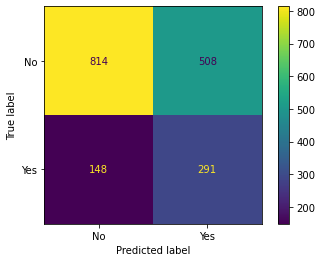

In [745]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

Interestingly, scaling the X_category using combined upscaling and downscaling and apply SMOTE on the y resulted in the model performing worse. the truth of the matter, it is suspected the model my have run much better with a better choice of variables, dropping off the SeniorCitizen x variable from the model all together. This is not withstanding that a different transformer for the X variables can perform much better however unlikely it is . 